# This Notebook calculates the average bombing missions for each month during each year of World War 2
* Compare with viz-a notebook to see if precipitation affected bombing operations during World War 2.

In [35]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [36]:
ops = pd.read_csv('operations.csv', low_memory=False)

In [37]:
ops.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


In [38]:
ops['month'] = pd.DatetimeIndex(ops['Mission Date']).month
ops['year'] = pd.DatetimeIndex(ops['Mission Date']).year

In [52]:
average_missions = ops.groupby(['year', 'month'],as_index=False)['Mission ID'].count()
average_missions.columns = ['year', 'month', 'number of missions']
average_missions


,year,month,number of missions
0,1939,9,15
1,1939,10,5
2,1939,11,5
3,1939,12,16
4,1940,5,28
...,...,...,...
65,1945,6,2659
66,1945,7,1796
67,1945,8,848
68,1945,9,3


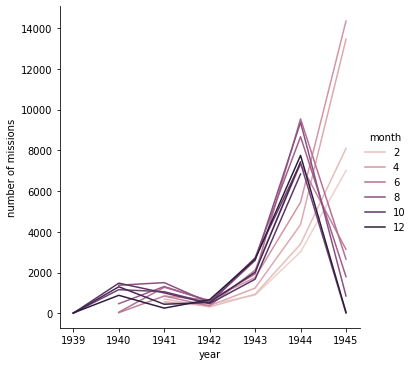

In [53]:
sns.relplot(x='year', y='number of missions', hue='month', data=average_missions, kind='line')

## Summary
* As expected, a little rain didnt stop World War 2 bombers from dropping bombs. bombings steadily increased as the war went on, and dropped sharply when the war ended. I dont see any corelation between precipitation and number of bombing missions.
* Looking if poor weather had an effect on number of bombing missions may yield more interesting conclusions.
* Grouping by location may also yield interesting results.